<a href="https://colab.research.google.com/github/VindhyaHV/Python_ML_CaseStudy/blob/main/NextLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

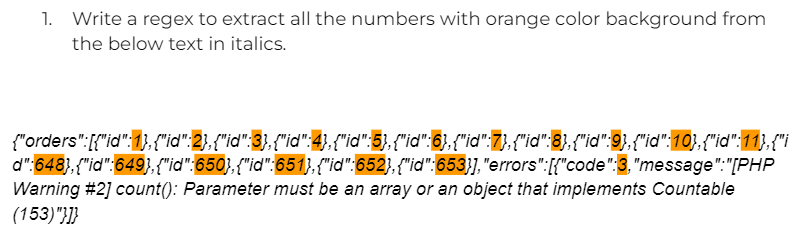

In [ ]:
sentence = '''{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},
           {"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},
           {"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): 
           Parameter must be an array or an object that implements Countable (153)"}]}'''
import re 
print(re.findall(':([0-9]{1,3})',sentence ))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


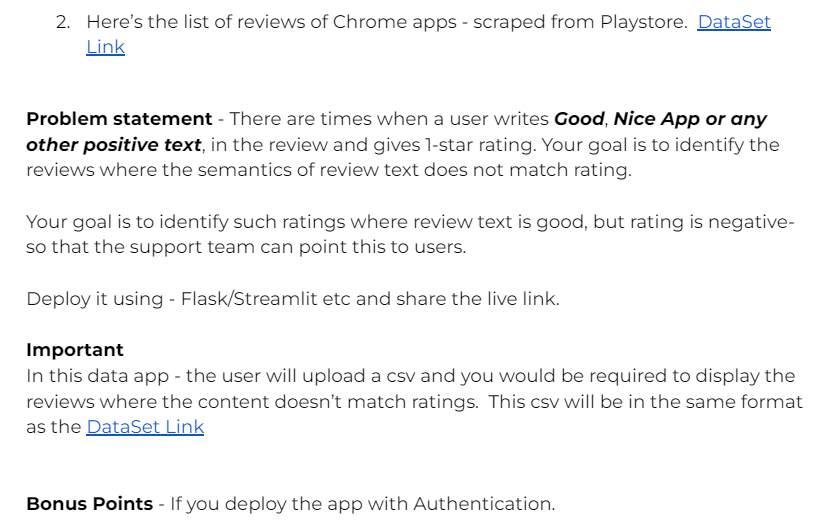

####Installation

In [5]:
pip install jupyter-dash

     |████████████████████████████████| 9.8 MB 6.2 MB/s 
     |████████████████████████████████| 357 kB 58.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=580943316f72f3797c5caf5867ab8c6556e4b9d923a9383a3e43c24d59b5b4d0
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
pip install dash

In [6]:
pip install jupyter-dash

####Model

In [9]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
from dash import dcc, html, dash_table

import pandas as pd
import re
import pandas as pd
import numpy as np
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk 
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import nltk
nltk.download('vader_lexicon')

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Upload(
        id='upload-data',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
        ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded
        multiple=True
    ),
    html.Div(id='output-data-upload'),
])

def generate_table(df):
  sentences = df['Text']
  #removing everything other than word
  sentences = [re.sub('\W',' ',str(i)) for i in sentences]
  s = SentimentIntensityAnalyzer()
  pos,neg,com,neu = [],[],[],[]
  for i in sentences:
    value = s.polarity_scores(i)
    com.append(value['compound'])
    pos.append(value['pos'])
    neg.append(value['neg'])
    neu.append(value['neu'])
  df['pos'] = pos
  df['neg'] = neg
  df['neu'] = neu
  df['com'] = com
  Star_expected = []
  for i in range(len(df)):
    maximum = max(df['pos'][i],df['neg'][i],df['neu'][i],df['com'][i])
    if df['pos'][i] == maximum:
      Star_expected.append('pos')
    elif df['neg'][i] == maximum:
      Star_expected.append('neg')
    elif df['neu'][i] == maximum:
      Star_expected.append('neu')
    else:
      Star_expected.append('com')
  df['result'] = Star_expected
  df =  df[['ID','Review URL','Text','Star','Thumbs Up','User Name','Developer Reply',
  'Version','Review Date','App ID']][(df['Star']== 1) | (df['Star'] == 2)][df['result']=='pos']

  return df




def parse_contents(contents, filename, date):
    content_type, content_string = contents.split(',')

    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            # Assume that the user uploaded a CSV file
            df = pd.read_csv(
                io.StringIO(decoded.decode('utf-8')))
            df = generate_table(df)
        elif 'xls' in filename:
            # Assume that the user uploaded an excel file
            df = pd.read_excel(io.BytesIO(decoded))
            df = generate_table(df)
    except Exception as e:
        print(e)
        return html.Div([
            'There was an error processing this file.'
        ])

    return html.Div([
        html.H5(filename),
        html.H6(datetime.datetime.fromtimestamp(date)),

        dash_table.DataTable(
            df.to_dict('records'),
                    style_data={
        'whiteSpace': 'normal',
        'height': 'auto',
        'lineHeight': '15px'
                           }
        )

    ])

@app.callback(Output('output-data-upload', 'children'),
              Input('upload-data', 'contents'),
              State('upload-data', 'filename'),
              State('upload-data', 'last_modified'))
def update_output(list_of_contents, list_of_names, list_of_dates):
    if list_of_contents is not None:
        children = [
            parse_contents(c, n, d) for c, n, d in
            zip(list_of_contents, list_of_names, list_of_dates)]
        return children

if __name__ == '__main__':
    app.run_server(debug=True)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Dash app running on:


<IPython.core.display.Javascript object>

### 3. Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute. Here’s the dataset. 

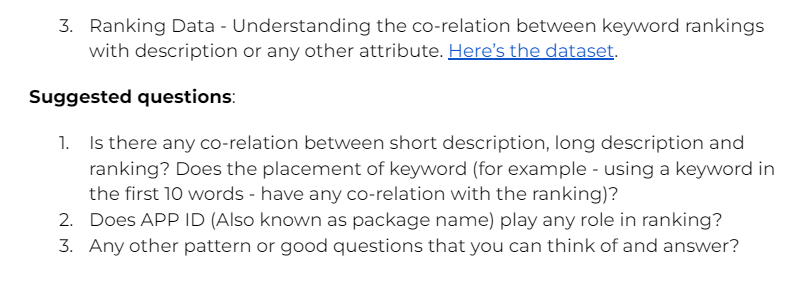

In [10]:
df = pd.read_csv('browser_rankings_data.csv')

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Rank
ID,1.000000,0.008355
Rank,0.008355,1.000000


Label encoding 

Keyword

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = df[['ID','Rank']]
data['Keyword']=le.fit_transform(df['Keyword'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country

In [13]:
df.isna().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

Date

In [14]:
data['Date'] = le.fit_transform(df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



App ID

In [15]:
data['App ID'] = le.fit_transform(df['App ID'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date of Last Description Change

In [16]:
data['Date Last'] = le.fit_transform(df['Date of Last Description Change'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Short Description

In [17]:
data['Short'] = le.fit_transform(df['Short Description'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Long Description

In [18]:
data['Long'] = le.fit_transform(df['Long Description'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Correlation

In [19]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Rank,Keyword,Date,App ID,Date Last,Short,Long
ID,1.000000,0.008355,0.001623,-0.152197,0.000907,0.000118,-0.002761,0.002429
Rank,0.008355,1.000000,0.103763,0.001780,0.528693,0.091066,-0.222662,0.339430
Keyword,0.001623,0.103763,1.000000,-0.000214,0.067906,0.008908,-0.206424,0.181591
Date,-0.152197,0.001780,-0.000214,1.000000,-0.000113,-0.000015,0.000345,-0.000303
App ID,0.000907,0.528693,0.067906,-0.000113,1.000000,0.199522,-0.072573,0.124045
Date Last,0.000118,0.091066,0.008908,-0.000015,0.199522,1.000000,-0.088324,-0.434963
Short,-0.002761,-0.222662,-0.206424,0.000345,-0.072573,-0.088324,1.000000,-0.513976
Long,0.002429,0.339430,0.181591,-0.000303,0.124045,-0.434963,-0.513976,1.000000




```
 1. Is there any co-relation between short description, long description and ranking? 
```


We can see that Long Description and Rank are having a positive correlation (0.33) whereas Short Desciption and Rank are having negative correlation(-0.22)


```
2. Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

```



In [20]:
#checking if first 10 words of Long and Short Desciptions are having the keyword
keyInLong = []
keyInShort = []
for i in range(len(df)):
  if df['Keyword'][i] in df['Long Description'][i].split()[0:10]:
    keyInLong.append(0)
  else:
    keyInLong.append(1)
  if df['Keyword'][i] in df['Short Description'][i].split()[0:10]:
    keyInShort.append(0)
  else:
    keyInShort.append(1)


In [21]:
data['keyInShort'] = keyInShort
data['keyInLong'] = keyInLong

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
corr = data.corr()
corr.style.background_gradient()

,ID,Rank,Keyword,Date,App ID,Date Last,Short,Long,keyInShort,keyInLong
ID,1.000000,0.008355,0.001623,-0.152197,0.000907,0.000118,-0.002761,0.002429,0.000948,0.000949
Rank,0.008355,1.000000,0.103763,0.001780,0.528693,0.091066,-0.222662,0.339430,0.055725,0.065001
Keyword,0.001623,0.103763,1.000000,-0.000214,0.067906,0.008908,-0.206424,0.181591,-0.012928,-0.012928
Date,-0.152197,0.001780,-0.000214,1.000000,-0.000113,-0.000015,0.000345,-0.000303,-0.000118,-0.000118
App ID,0.000907,0.528693,0.067906,-0.000113,1.000000,0.199522,-0.072573,0.124045,0.282658,-0.058669
Date Last,0.000118,0.091066,0.008908,-0.000015,0.199522,1.000000,-0.088324,-0.434963,-0.035683,-0.035683
Short,-0.002761,-0.222662,-0.206424,0.000345,-0.072573,-0.088324,1.000000,-0.513976,0.014407,0.074587
Long,0.002429,0.339430,0.181591,-0.000303,0.124045,-0.434963,-0.513976,1.000000,0.248296,0.163455
keyInShort,0.000948,0.055725,-0.012928,-0.000118,0.282658,-0.035683,0.014407,0.248296,1.000000,-0.025418
keyInLong,0.000949,0.065001,-0.012928,-0.000118,-0.058669,-0.035683,0.074587,0.163455,-0.025418,1.000000


We can see that having keyword in first 10 words does not having much correlation with the Keyword

In [23]:
df['Short'],df['Long'],df['keyInShort'],df['keyInLong'],df['key']= data['Short'],data['Long'],data['keyInShort'],data['keyInLong'],data['Keyword']

In [24]:
df[['Short Description','Keyword','keyInShort']][df['Short']==3]

,Short Description,Keyword,keyInShort
1,"Fast, simple, and secure. Google Chrome browse...",browser,0
9,"Fast, simple, and secure. Google Chrome browse...",android browser,1
23,"Fast, simple, and secure. Google Chrome browse...",browser,0
31,"Fast, simple, and secure. Google Chrome browse...",android browser,1
32,"Fast, simple, and secure. Google Chrome browse...",browser,0
...,...,...,...
2978,"Fast, simple, and secure. Google Chrome browse...",android browser,1
3011,"Fast, simple, and secure. Google Chrome browse...",browser,0
3019,"Fast, simple, and secure. Google Chrome browse...",android browser,1
3051,"Fast, simple, and secure. Google Chrome browse...",browser,0


Keyword present in Short Desciption

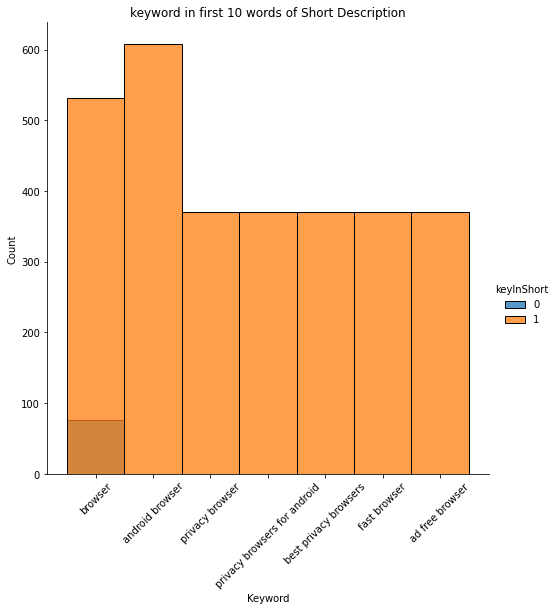

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df,hue='keyInShort',height=7).map(sns.histplot,'Keyword').add_legend()
plt.xticks(rotation=45)
plt.title('keyword in first 10 words of Short Description')
plt.show()

We can see that, only browser appears in all the short descriptions within first 10 words

Keyword present in Long Description

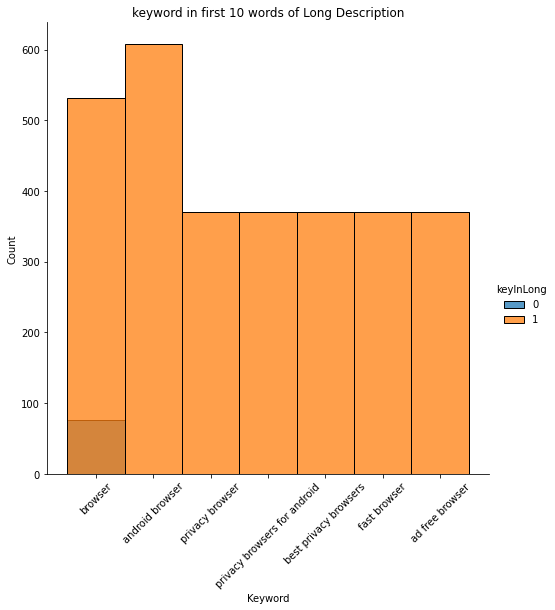

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df,hue='keyInLong',height=7).map(sns.histplot,'Keyword').add_legend()
plt.xticks(rotation=45)
plt.title('keyword in first 10 words of Long Description')
plt.show()

We can see that only browser keyword appears within 10 words of Long Description



```
Does APP ID (Also known as package name) play any role in ranking?
```



In [27]:
corr = data.corr()
corr.style.background_gradient()

,ID,Rank,Keyword,Date,App ID,Date Last,Short,Long,keyInShort,keyInLong
ID,1.000000,0.008355,0.001623,-0.152197,0.000907,0.000118,-0.002761,0.002429,0.000948,0.000949
Rank,0.008355,1.000000,0.103763,0.001780,0.528693,0.091066,-0.222662,0.339430,0.055725,0.065001
Keyword,0.001623,0.103763,1.000000,-0.000214,0.067906,0.008908,-0.206424,0.181591,-0.012928,-0.012928
Date,-0.152197,0.001780,-0.000214,1.000000,-0.000113,-0.000015,0.000345,-0.000303,-0.000118,-0.000118
App ID,0.000907,0.528693,0.067906,-0.000113,1.000000,0.199522,-0.072573,0.124045,0.282658,-0.058669
Date Last,0.000118,0.091066,0.008908,-0.000015,0.199522,1.000000,-0.088324,-0.434963,-0.035683,-0.035683
Short,-0.002761,-0.222662,-0.206424,0.000345,-0.072573,-0.088324,1.000000,-0.513976,0.014407,0.074587
Long,0.002429,0.339430,0.181591,-0.000303,0.124045,-0.434963,-0.513976,1.000000,0.248296,0.163455
keyInShort,0.000948,0.055725,-0.012928,-0.000118,0.282658,-0.035683,0.014407,0.248296,1.000000,-0.025418
keyInLong,0.000949,0.065001,-0.012928,-0.000118,-0.058669,-0.035683,0.074587,0.163455,-0.025418,1.000000


App ID has highest correlation with ranking 

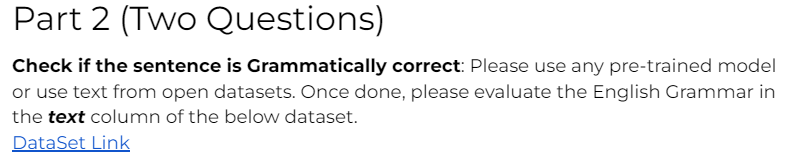

###Installation

In [2]:
pip install happytransformer

     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 342 kB 8.8 MB/s 
     |████████████████████████████████| 4.2 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 48.6 MB/s 
     |████████████████████████████████| 140 kB 65.9 MB/s 
     |████████████████████████████████| 212 kB 67.1 MB/s 
     |████████████████████████████████| 1.1 MB 45.4 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 127 kB 61.2 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
     |████████████████████████████████| 6.6 MB 36.3 MB/s 
     |████████████████████████████████| 144 kB 58.6 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 57.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Fo

In [3]:

from happytransformer import HappyTextToText,TTSettings
import pandas as pd
import numpy as np
from google.colab import files
from tqdm import tqdm

####Model

In [4]:
#https://happytransformer.com/text-to-text/usage/
#https://happytransformer.com/text-to-text/settings/

#prithivida/grammar_error_correcter_v1
happy_tt = HappyTextToText('T5','tuner007/pegasus_paraphrase')
args = TTSettings(min_length=1,num_beams=5)

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

05/20/2022 01:58:13 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [28]:
df = pd.read_csv('review_data.csv')

In [29]:
df.shape

(30000, 4)

In [30]:

correction = []
for i in tqdm(df['text'][0:20]):
  try:
    result = happy_tt.generate_text(i,args=args)
    correction.append(result.text)
  except IndexError as e:
    correction.append(np.nan)


100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


In [32]:
print(df['text'][0:20],correction)

0                                       Anathi Khanyile
1     Tony bahut funny hai Hill climbing racing my f...
2                                               Teturwu
3     Hoooooooooooyaaaaaaaaa what a game hoooooooooo...
4                                     This game is nice
5                                           Rahulyadavo
6     First thing is that I like this game, it's fan...
7                                             Very taty
8                                                  good
9                                      I LIKE THIS GAME
10                                               Racing
11                                                  😆😆😆
12                   Awesome game. easy to use options.
13                                       Very noob game
14                         Hill climb racing 2 vip game
15                                           Good games
16                                   I is so oosem game
17                                            Go

In [ ]:
df.to_csv('review_data_.csv')
files.download('review_data.csv')